# Part A. 

Howell and Huessy classified children as exhibiting (or not exhibiting) attention deficit disorder (ADD)-related behaviors in second, fourth, and fifth grade. The subjects were then sorted on the basis of the year(s) in which the individuals were classed as exhibiting such behavior. They then looked at GPA for these children when the latter were in high school. The data are given in terms of mean GPA per group.

<img src="Images\pr31.jpg" width="450"/>

- Run the analysis of variance and draw the appropriate conclusion.
- Leaving out the Never ADD group. In what way does this analysis clarify the interpretation of the data?
- Calculate Cohen’s d to examine the pairwise effect sizes—in other words, calculate d on the comparison of each group with each of the other groups.
- What is a reasonable set of conclusions from this study?

# Method A Replicating data

In [7]:
library(rstatix)
library(ggpubr)

In [7]:
means = c(2.6774, 1.6123, 1.9975, 2.0287, 1.7000, 1.9000, 1.8986, 1.4225)
sds = c(0.9721, 1.0097, 0.7642, 0.5461, 0.8788, 1.0318, 0.3045, 0.5884)
n = c(201, 13, 12, 8, 14, 9, 7, 8)


set.seed(12)

# che dasture zibaii !!! 
simulated_data = lapply(seq_along(means), function(i) {
  rnorm(n[i], mean = means[i], sd = sds[i])
})


ADD_data = data.frame(
  Years = rep(seq_along(means), times = sapply(simulated_data, length)),
  GPA = unlist(simulated_data)
)

Since there was No data provided, but only statistics, I simulated data from them in order to do analysis.

In [8]:
ADD_data = ADD_data %>% mutate (Years = ifelse (Years == "1", "NoADD", ifelse(Years == "2", "Second_only", ifelse(Years == "3", "Forth_only", ifelse(Years == "4", "Second_Forth", ifelse(Years == "5", "Fifth_only", ifelse(Years == "6", "Second_Fifth", ifelse(Years == "7", "Forth_Fifth", "All_three"))))))))

In [9]:
ADD_data

Years,GPA
<chr>,<dbl>
NoADD,1.2381402
NoADD,4.2105664
NoADD,1.7473487
NoADD,1.7830629
NoADD,0.7354921
NoADD,2.4127010
NoADD,2.3708495
NoADD,2.0666731
NoADD,2.5739065


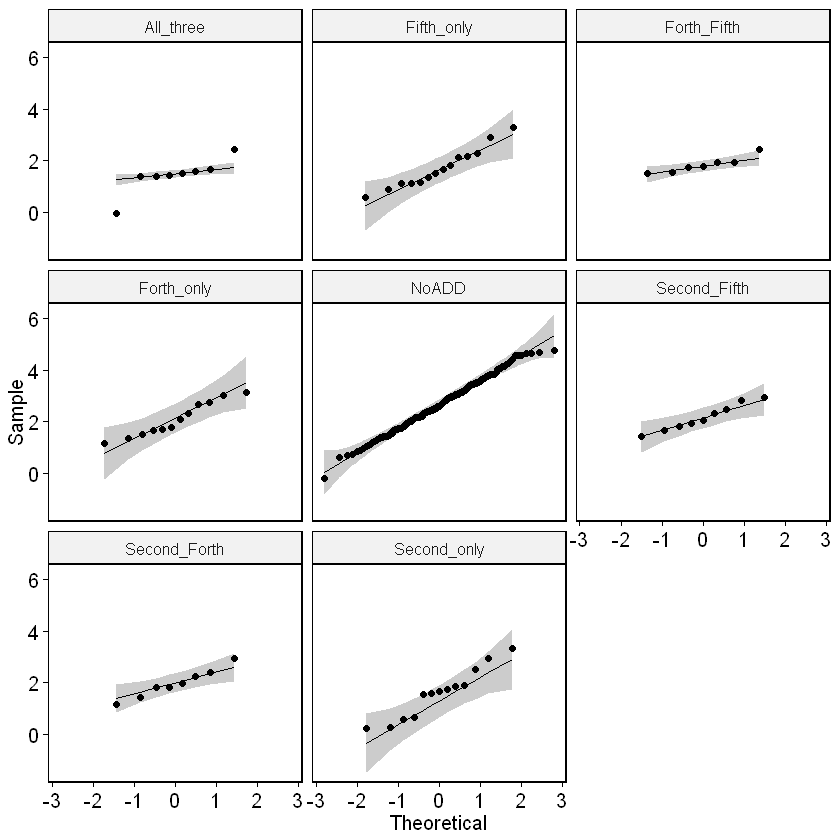

In [10]:
ggqqplot(ADD_data, "GPA", facet.by = "Years")

In [17]:
ADD_data %>% group_by(Years) %>% identify_outliers(GPA)

Years,GPA,is.outlier,is.extreme
<chr>,<dbl>,<lgl>,<lgl>
All_three,2.44873739,TRUE,TRUE
All_three,-0.06873048,TRUE,TRUE
Forth_Fifth,2.42879064,TRUE,FALSE
NoADD,-0.22573394,TRUE,FALSE


In [67]:
ADD_data = ADD_data[-c(269,271), ]

In [18]:
ADD_data %>% levene_test(GPA~Years)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
7,264,2.335124,0.025036


In [71]:
ADD_data %>% group_by(Years) %>% shapiro_test(GPA)

Years,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
All_three,GPA,0.9018844,0.3851886
Fifth_only,GPA,0.9565630,0.6663220
Forth_Fifth,GPA,0.8997690,0.3295850
Forth_only,GPA,0.9328470,0.4112685
NoADD,GPA,0.9951698,0.7715956
Second_Fifth,GPA,0.9613372,0.8122093
Second_Forth,GPA,0.9820332,0.9722578
Second_only,GPA,0.9412044,0.4726866


In [8]:
ADD_data %>% anova_test(GPA ~ Years)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Years,7,264,7.591,2.41e-08,*,0.168


In [74]:
ADD_data %>% kruskal_test(GPA~Years)

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,GPA,270,46.22176,7,7.91e-08,Kruskal-Wallis


There is alot to say here, first, most of our groups are normally distributed but one, which was due to extreme ourliers that we identified, by removing the ourliers all the distributions get normal, but the result of levene test shows that the variances are not homeogenous, no matter if we remove the outliers or not, so just in case I computed both anova exam and kruskal valis exam. but since both of them show meaningful significance, we'll be sure that no matter about the outliers or homeogenity of variances, the result we report is significant.

In [11]:
ADD_data %>% wilcox_test(GPA~Years, p.adjust.method = "bonferroni")

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,GPA,All_three,Fifth_only,8,14,51,0.764000,1.000,ns
2,GPA,All_three,Forth_Fifth,8,7,11,0.054000,1.000,ns
3,GPA,All_three,Forth_only,8,12,23,0.057000,1.000,ns
4,GPA,All_three,NoADD,8,201,213,0.000431,0.012,*
5,GPA,All_three,Second_Fifth,8,9,9,0.008000,0.221,ns
6,GPA,All_three,Second_Forth,8,8,17,0.130000,1.000,ns
7,GPA,All_three,Second_only,8,13,39,0.374000,1.000,ns
8,GPA,Fifth_only,Forth_Fifth,14,7,38,0.443000,1.000,ns
9,GPA,Fifth_only,Forth_only,14,12,57,0.176000,1.000,ns


In [9]:
ADD_data %>% tukey_hsd(GPA~Years)

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Years,All_three,Fifth_only,0,0.29690064,-0.8943890,1.4881903,0.995000,ns
2,Years,All_three,Forth_Fifth,0,0.42495405,-0.9661725,1.8160806,0.983000,ns
3,Years,All_three,Forth_only,0,0.67665372,-0.5502046,1.9035120,0.697000,ns
4,Years,All_three,NoADD,0,1.24218650,0.2731388,2.2112342,0.002850,**
5,Years,All_three,Second_Fifth,0,0.74314908,-0.5629414,2.0492395,0.662000,ns
6,Years,All_three,Second_Forth,0,0.54904077,-0.7949152,1.8929967,0.916000,ns
7,Years,All_three,Second_only,0,0.17865613,-1.0291800,1.3864923,1.000000,ns
8,Years,Fifth_only,Forth_Fifth,0,0.12805341,-1.1162080,1.3723149,1.000000,ns
9,Years,Fifth_only,Forth_only,0,0.37975308,-0.6776658,1.4371720,0.957000,ns


In [12]:
pair_tested = ADD_data %>% tukey_hsd(GPA~Years)

In [17]:
boxpl = ggboxplot(ADD_data, x= "Years", y = "GPA", color = "Years")

In [18]:
pair_tested = pair_tested %>% add_xy_position(x = "Years")

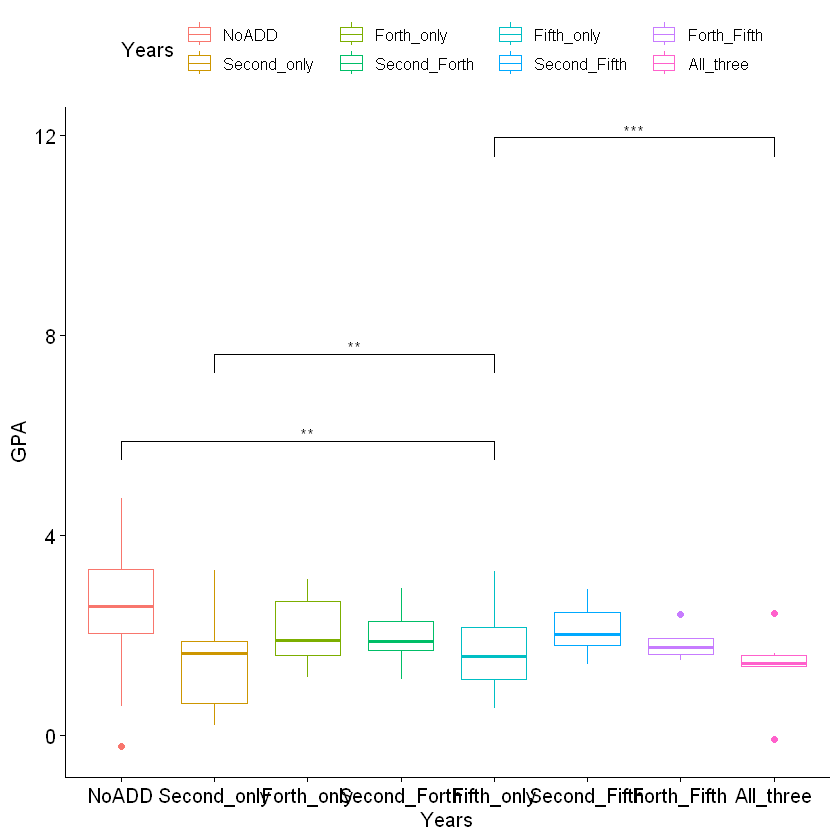

In [20]:
boxpl + stat_pvalue_manual(pair_tested, hide.ns = TRUE)

# Answer:
The conclusion that one can draw from comparison of variances and two by two comparison of tukey test, is that having or not having ADD effects the GPA of the students, but for how many of the Years of education one of diagnosed with ADD is not a effecting factor, atleast as the tukey test results show, since only significancy observable is between NOADD group and other ADD diagnosed groups and there is not a significant difference between the years in which students were diagnosed.

In [75]:
ADD_data %>% cohens_d(GPA~Years)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,GPA,All_three,Fifth_only,-0.4022278,6,14,small
2,GPA,All_three,Forth_Fifth,-1.4925824,6,7,large
3,GPA,All_three,Forth_only,-1.2525389,6,12,large
4,GPA,All_three,NoADD,-1.7697762,6,201,large
5,GPA,All_three,Second_Fifth,-1.8087532,6,9,large
6,GPA,All_three,Second_Forth,-1.1630532,6,8,large
7,GPA,All_three,Second_only,-0.1515164,6,13,negligible
8,GPA,Fifth_only,Forth_Fifth,-0.2161828,14,7,small
9,GPA,Fifth_only,Forth_only,-0.5229529,14,12,moderate


### Interestingly, for the three pairs that we found significany, the effect size is large for them too, so we can confidently report out results.

# Method B: Manual Calculation, (bad idea)

In [1]:
Never_Add = c(2.6774, 0.9721, 201)
Second_only = c(1.6123, 1.0097, 13)
Forth_only = c(1.9975, 0.7642, 12)
Second_forth = c(2.0287, 0.5461, 8)
Fifth_only = c(1.7000, 0.8788, 14)
Second_fifth = c(1.9000, 1.0318, 9)
Fourth_fifth = c(1.8986, 0.3045, 7)
second_fourth_fifth <- c(1.4225, 0.5884, 8)

In [2]:
data_summary1 = data.frame(
  group = rep(c("Never_Add", "Second_only", "Forth_only", "Second_forth", "Fifth_only", "Second_fifth", "Fourth_fifth", "second_fourth_fifth")),
  mean = c(Never_Add[1], Second_only[1], Forth_only[1], Second_forth[1], Fifth_only[1], Second_fifth[1], Fourth_fifth[1], second_fourth_fifth[1]),
  sd = c(Never_Add[2], Second_only[2], Forth_only[2], Second_forth[2], Fifth_only[2], Second_fifth[2], Fourth_fifth[2], second_fourth_fifth[2]),
  n = c(Never_Add[3], Second_only[3], Forth_only[3], Second_forth[3], Fifth_only[3], Second_fifth[3], Fourth_fifth[3], second_fourth_fifth[3])
)
data_summary1

group,mean,sd,n
<chr>,<dbl>,<dbl>,<dbl>
Never_Add,2.6774,0.9721,201
Second_only,1.6123,1.0097,13
Forth_only,1.9975,0.7642,12
Second_forth,2.0287,0.5461,8
Fifth_only,1.7000,0.8788,14
Second_fifth,1.9000,1.0318,9
Fourth_fifth,1.8986,0.3045,7
second_fourth_fifth,1.4225,0.5884,8


In [3]:
mean_all = mean(data_summary1$mean)
SSB = sum(data_summary1$n * (data_summary1$mean - mean_all)^2)
SSW = sum((data_summary1$n - 1) * data_summary1$sd^2)

mean_all
SSB
SSW

[1] 1.904625

[1] 123.8172

[1] 231.2777

In [4]:
df_between = length(unique(data_summary1$group)) - 1
df_within = sum(data_summary1$n - 8)
df_between
df_within

[1] 7

[1] 208

In [5]:
MSB = SSB / df_between
MSW = SSW / df_within
MSB
MSW

[1] 17.68817

[1] 1.111912

In [6]:
F_statistic = MSB / MSW
F_statistic

[1] 15.90789

In [7]:
p_value = 1 - pf(F_statistic, df_between, df_within)
p_value

[1] 1.110223e-16

In [8]:
calculate_cohens_d = function(mean1, sd1, n1, mean2, sd2, n2) {
  pooled_sd = sqrt(((n1 - 1) * sd1^2 + (n2 - 1) * sd2^2) / (n1 + n2 - 2))
  cohens_d = (mean1 - mean2) / pooled_sd
  return(cohens_d)
}


groups = c("Never_Add", "Second_only", "Forth_only", "Second_forth", "Fifth_only", "Second_fifth", "Fourth_fifth", "second_fourth_fifth")

for (i in 1:(length(groups) - 1)) {
  for (j in (i + 1):length(groups)) {
    group1 = get(groups[i])
    group2 = get(groups[j])
    
    cohens_d <- calculate_cohens_d(group1[1], group1[2], group1[3], group2[1], group2[2], group2[3])
    
    cat(paste("Cohen's d (", groups[i], " vs. ", groups[j], "):", cohens_d, "\n"))
  }
}

Cohen's d ( Never_Add  vs.  Second_only ): 1.09323209009971 
Cohen's d ( Never_Add  vs.  Forth_only ): 0.706483620950703 
Cohen's d ( Never_Add  vs.  Second_forth ): 0.675177173850073 
Cohen's d ( Never_Add  vs.  Fifth_only ): 1.01110655202604 
Cohen's d ( Never_Add  vs.  Second_fifth ): 0.797772077484079 
Cohen's d ( Never_Add  vs.  Fourth_fifth ): 0.811886581178655 
Cohen's d ( Never_Add  vs.  second_fourth_fifth ): 1.30497310717706 
Cohen's d ( Second_only  vs.  Forth_only ): -0.427679336376757 
Cohen's d ( Second_only  vs.  Second_forth ): -0.479615470745588 
Cohen's d ( Second_only  vs.  Fifth_only ): -0.0929123606967099 
Cohen's d ( Second_only  vs.  Second_fifth ): -0.282447177116889 
Cohen's d ( Second_only  vs.  Fourth_fifth ): -0.339639407086639 
Cohen's d ( Second_only  vs.  second_fourth_fifth ): 0.21609468207511 
Cohen's d ( Forth_only  vs.  Second_forth ): -0.0453717346680846 
Cohen's d ( Forth_only  vs.  Fifth_only ): 0.359192949832885 
Cohen's d ( Forth_only  vs.  Secon

# Part B. 

Davey, Startup, Zara, MacDonald, and Field were interested in the role of mood on the degree of compulsive checking in which a person engaged. (Compulsive checking is involved in a number of psychopathologies.) Three groups of 10 participants each listened to music designed to induce positive, negative, or neutral mood. They were then asked to “list as many things around your home that you should check for safety or security reasons before you go away for three weeks.” The dependent variable was the number of things listed. The actual data follows.

<img src="Images/pr32.jpg" width="250"/>

- Run the appropriate analysis of variance and draw you own conclusion.
- Calculate Cohen’s d to examine the pairwise effect sizes—in other words, calculate d on the comparison of each group with each of the other groups.
- What is a reasonable set of conclusions from this study?


In [63]:
MI_data = data.frame (
    Negative = c(7,5,16,13,13,24,20,10,11,7),
    Positive = c(9,12,7,3,10,4,5,4,7,9),
    None = c(8,5,11,9,11,10,11,10,7,5))

In [64]:
library(rstatix)
library(ggpubr)

In [65]:
MI_data

Negative,Positive,None
<dbl>,<dbl>,<dbl>
7,9,8
5,12,5
16,7,11
13,3,9
13,10,11
24,4,10
20,5,11
10,4,10
11,7,7


In [66]:
MI_long = gather (MI_data, key = "Induced_mood", value = "items_checked", Negative, Positive, None)

In [67]:
MI_long

Induced_mood,items_checked
<chr>,<dbl>
Negative,7
Negative,5
Negative,16
Negative,13
Negative,13
Negative,24
Negative,20
Negative,10
Negative,11


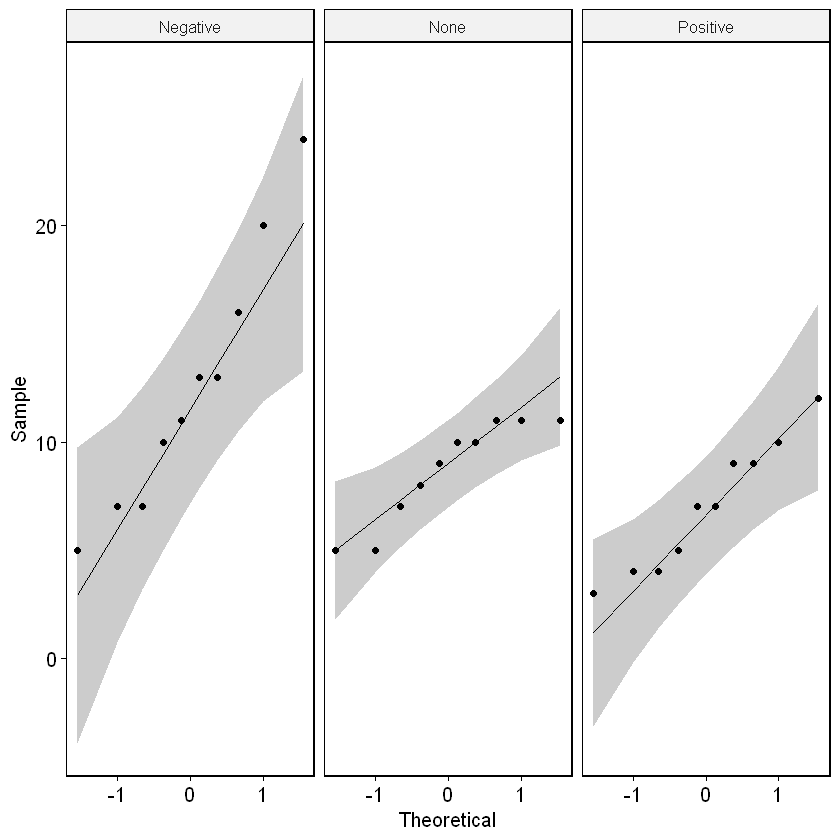

In [45]:
ggqqplot(MI_long, "items_checked", facet.by = "Induced_mood")

In [46]:
MI_long %>% group_by(Induced_mood) %>% identify_outliers(items_checked)

Induced_mood,items_checked,is.outlier,is.extreme
<chr>,<dbl>,<lgl>,<lgl>


In [47]:
MI_long %>% group_by(Induced_mood) %>% shapiro_test(items_checked)

Induced_mood,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
Negative,items_checked,0.9441600,0.60015932
None,items_checked,0.8587379,0.07373638
Positive,items_checked,0.9461599,0.62334439


In [48]:
MI_long %>% levene_test(items_checked ~ Induced_mood)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,27,3.455955,0.04609516


##### There are no outliers, and all the data is normally distributed, yet levene test p value report is a bit low but no that far away from 0.05, so I guess we could perform parametric hypo exam.

In [62]:
MI_long %>% anova_test(items_checked~Induced_mood)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Induced_mood,2,27,4.876,0.016,*,0.265


In [68]:
MI_long %>% kruskal_test(items_checked ~ Induced_mood)

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,items_checked,30,6.734873,2,0.0345,Kruskal-Wallis


In [7]:
MI_long  %>% emmeans_test(items_checked~Induced_mood, p.adjust.method = "bonferroni")

,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Induced_mood,items_checked,Negative,None,27,2.1208556,0.043264202,0.12979261,ns
2,Induced_mood,items_checked,Negative,Positive,27,3.0453311,0.005139881,0.01541964,*
3,Induced_mood,items_checked,None,Positive,27,0.9244755,0.363427968,1.00000000,ns


In [69]:
MI_long %>% wilcox_test(items_checked~Induced_mood, p.adjust.method = "bonferroni")

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,items_checked,Negative,None,10,10,70.5,0.127,0.381,ns
2,items_checked,Negative,Positive,10,10,81.0,0.020,0.061,ns
3,items_checked,None,Positive,10,10,69.0,0.159,0.477,ns


In [99]:
MI_long %>% cohens_d(items_checked~Induced_mood)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,items_checked,Negative,None,0.8527434,10,10,large
2,items_checked,Negative,Positive,1.1785484,10,10,large
3,items_checked,None,Positive,0.6323340,10,10,moderate


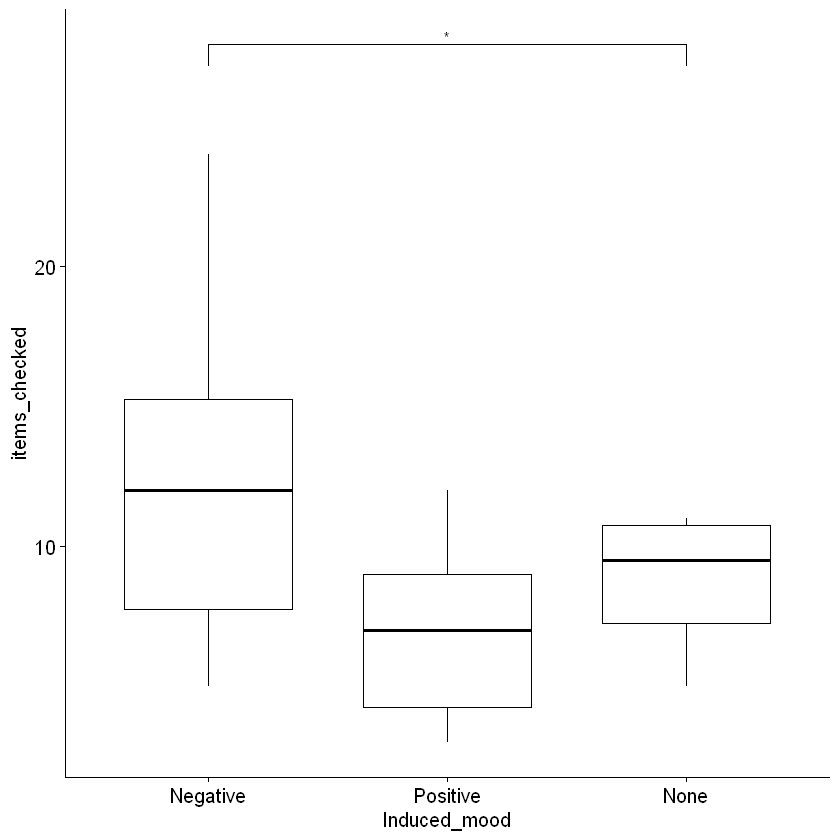

In [12]:
ggboxplot(MI_long, x = "Induced_mood", y = "items_checked") + stat_pvalue_manual(tresp1, hide.ns = TRUE)

# Answer:
Apparently the colaboration of state of mood and and degree of compolsive checking is meaningful due to the report of anova test, meanwhile the post hoc test performed reports that there is significant difference between positive and negative mood induction and compolsive checking. meanwhile, the effesize for thm is large too, so its safe to report that there is meaningful evidence.

# Part C.

Strayer, Drews, & Couch (2006) ran a study in which they compared the driving behavior of a control group, a group that was at the legal limit for alcohol, and a group that was talking on a cell phone. I have modified their study slightly to make it suitable for this project, but the results are consistent with theirs. The three groups are given below 

<img src="Images\pr33.jpg" width="600"/>

- From these data is there evidence that cell phones lead to longer reaction times than baseline conditions? How does the cell phone condition differ from the alcohol-impaired condition?
- Calculate Cohen’s d to examine the pairwise effect sizes—in other words, calculate d on the comparison of each group with each of the other groups.
- What is a reasonable set of conclusions from this study?



In [28]:
Driving_Data = data.frame(
    Control = c(808, 757, 773, 937, 726, 788, 806, 792, 751, 765, 853, 655, 626, 721, 630, 722, 683, 709, 
               718, 812, 703, 791, 586, 864, 737, 701, 799, 844, 639, 705, 822, 935, 842, 827, 784, 838,
               795, 823, 791, 819),
    Alcohol = c(631, 656, 621, 706, 937, 538, 947, 855, 661, 887, 750, 945, 663, 880, 873, 830, 751, 855,
               815 ,593 ,666, 730, 1021, 906, 821 ,956 ,606, 660, 802 ,961, 629, 603, 826, 531, 828, 959,
               743 ,745, 922, 829),
    Cell_phone = c(909, 712, 805, 852 ,859 ,781, 841 ,822, 740, 910, 900, 912, 863, 785 ,863, 809 ,927 ,847 ,918 ,810 ,788,
                  929 ,798 ,863 ,981 ,842 ,1021, 827 ,876, 736 ,640 ,851 ,787, 703, 942 ,758 ,843 ,781 ,969 ,872))

In [29]:
Driving_Data

Control,Alcohol,Cell_phone
<dbl>,<dbl>,<dbl>
808,631,909
757,656,712
773,621,805
937,706,852
726,937,859
788,538,781
806,947,841
792,855,822
751,661,740


In [30]:
Driving_long = gather(Driving_Data, key = "Distraction", value = "Driving_behavior")

In [31]:
Driving_long

Distraction,Driving_behavior
<chr>,<dbl>
Control,808
Control,757
Control,773
Control,937
Control,726
Control,788
Control,806
Control,792
Control,751


In [32]:
Driving_long %>% group_by(Distraction) %>% get_summary_stats(Driving_behavior)

Distraction,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alcohol,Driving_behavior,40,531,1021,808.5,660.75,881.75,221.0,179.395,778.450,133.395,21.092,42.662
Cell_phone,Driving_behavior,40,640,1021,845.0,787.75,902.25,114.5,85.250,841.800,79.696,12.601,25.488
Control,Driving_behavior,40,586,937,786.0,715.75,819.75,104.0,80.060,766.925,79.276,12.535,25.354


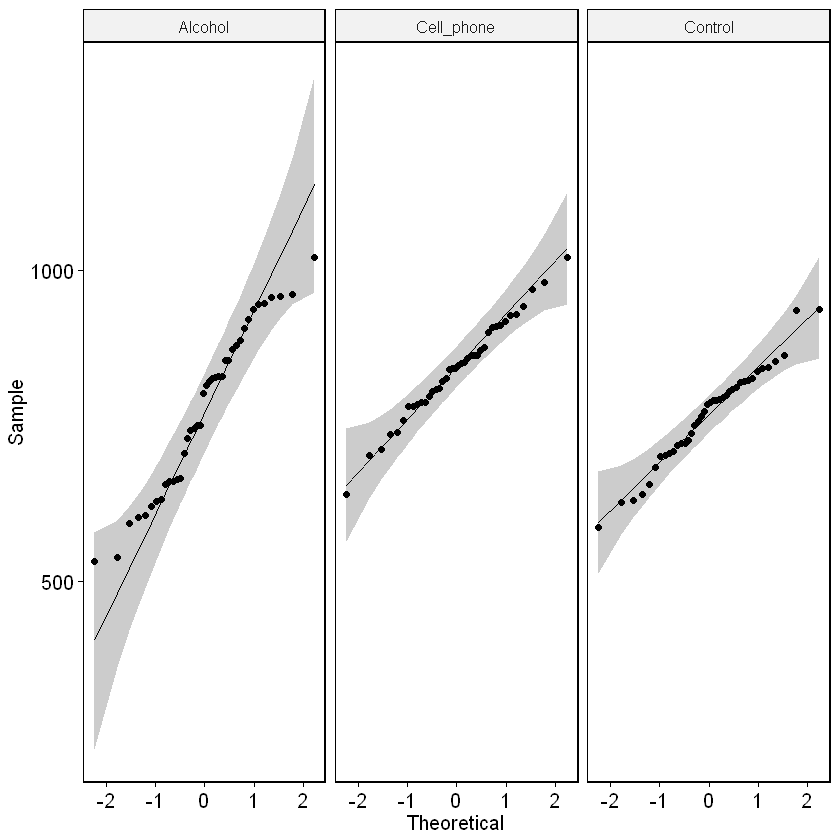

In [33]:
ggqqplot(Driving_long, "Driving_behavior", facet.by = "Distraction")

In [34]:
Driving_long %>% group_by(Distraction) %>% shapiro_test(Driving_behavior)

Distraction,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
Alcohol,Driving_behavior,0.9571318,0.1335359
Cell_phone,Driving_behavior,0.9927677,0.9957953
Control,Driving_behavior,0.9769110,0.5762613


In [36]:
Driving_long %>% group_by(Distraction) %>% identify_outliers(Driving_behavior)

Distraction,Driving_behavior,is.outlier,is.extreme
<chr>,<dbl>,<lgl>,<lgl>


In [37]:
Driving_long %>% levene_test(Driving_behavior~Distraction)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,117,10.42054,6.842612e-05


Eventhough the data is normally distributed, yet the levene test result shows that the variances are not homeogenous, so I guess we can't proceed with parametric hypotests.

In [165]:
Driving_long %>% kruskal_test(Driving_behavior~Distraction)

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,Driving_behavior,120,12.47607,2,0.00195,Kruskal-Wallis


In [166]:
Driving_long %>% wilcox_test(Driving_behavior ~ Distraction, p.adjust.method = "bonferroni")

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,Driving_behavior,Alcohol,Cell_phone,40,40,595.5,0.050000,0.149000,ns
2,Driving_behavior,Alcohol,Control,40,40,877.0,0.462000,1.000000,ns
3,Driving_behavior,Cell_phone,Control,40,40,1197.5,0.000133,0.000399,***


In [167]:
coxres = Driving_long %>% wilcox_test(Driving_behavior ~ Distraction, p.adjust.method = "bonferroni")

In [181]:
drivingbox = ggboxplot(Driving_long, x = "Distraction", y = "Driving_behavior", color = "Distraction")

In [183]:
coxres = coxres %>% add_xy_position(x = "Distraction")

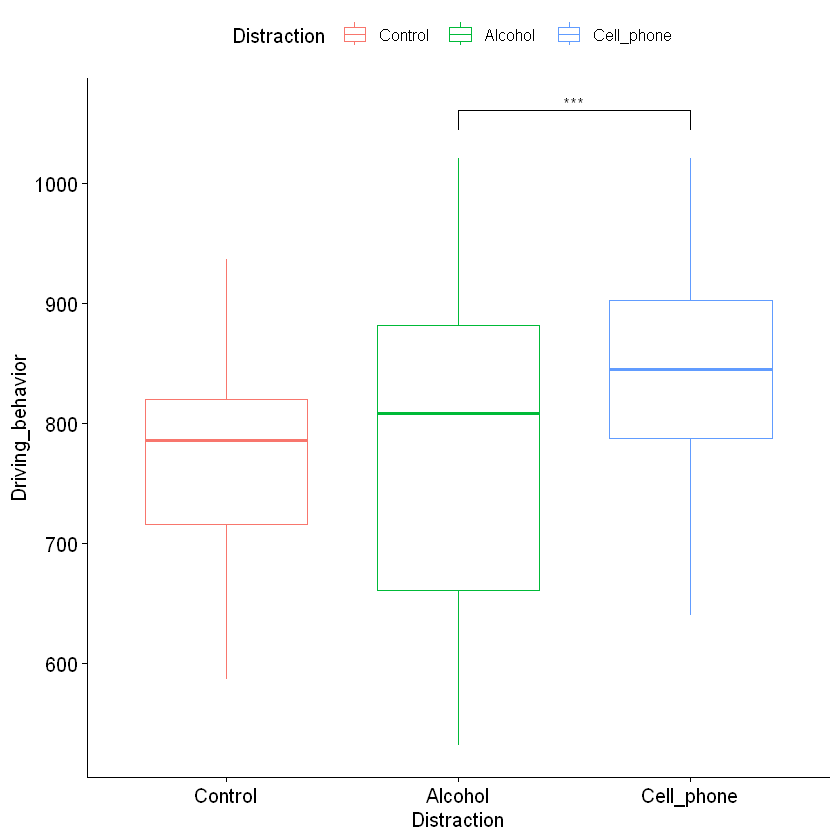

In [186]:
drivingbox + stat_pvalue_manual(coxres, hide.ns = TRUE)

# Answer:
The kruskal wallis test result shows that there is significant difference between groups that had distractors like alcohol consumption or cell phone usage while driving, meanwhile the post hoc test result shows that only cell phone usage while driving significantlly reduces quality of driving behavior, and legal dose of alcohol consumption does not effect the driving behavior quality, so one can conclude that cell phone usage is the main danger against quality of driving, and alcohol consumtion on legal dosage can have not much of a reduction in driving behavior quality.

In [38]:
Driving_long %>% cohens_d(Driving_behavior~Distraction)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Driving_behavior,Alcohol,Cell_phone,-0.5765545,40,40,moderate
2,Driving_behavior,Alcohol,Control,0.1050354,40,40,negligible
3,Driving_behavior,Cell_phone,Control,0.9419828,40,40,large


## Answer:
#### Interestingly, only the intraction of cell phone usage in comparison to control group has a large effect size and other comparisons are negligible even when modrate, which is in accordance to the results we reported above. cell phone usage is indeed a significant variable affecting the driving behavior.


# Part D. 

Gouzoulis-Mayfrank et al. examined the task performance of users of the drug Ecstacy and compared that with a group of Cannabis users and a control group of non-users. There were 28 participants in each group, and the Ecstacy users were almost all users of Cannabis as well. Performance was evaluated on several different tasks, but we will focus on a test of abstract thinking. The data given below were created to have the same means and variances as in the original study, and higher scores represent better performance. 

<img src="Images\pr34.jpg" width="450"/>

- Run an analysis of variance comparing the means of the three groups.
- Calculate Cohen’s d to examine the pairwise effect sizes—in other words, calculate d on the comparison of each group with each of the other groups.
- What is a reasonable set of conclusions from this study?


In [13]:
Drug_usage = data.frame(
    Ecstacy = c(25,25,23,32,21,28,34,26,23,22,26,21,29,28,
               23,24,29,23,30,18,25,25,25,25,32,23,29,32),
    Cannnibis = c(28,28,28,29,37,34,27,25,34,28,25,27,30,
                  29,31,32,30,29,32,25,32,31,32,22,31,25,
                  28,34),
    Control = c(29,31,31,25,33,21,28,40,35,32,29,31,25,32,
               33,34,28,28,25,22,27,34,38,31,30,31,26,30))

In [14]:
Drug_long = gather(Drug_usage, key = "Type", value= "Performance")

In [15]:
Drug_long

Type,Performance
<chr>,<dbl>
Ecstacy,25
Ecstacy,25
Ecstacy,23
Ecstacy,32
Ecstacy,21
Ecstacy,28
Ecstacy,34
Ecstacy,26
Ecstacy,23


In [16]:
Drug_long %>% group_by(Type) %>% get_summary_stats(Performance)

Type,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cannnibis,Performance,28,22,37,29.0,27.75,32.00,4.25,2.965,29.393,3.392,0.641,1.315
Control,Performance,28,21,40,30.5,27.75,32.25,4.50,3.706,29.964,4.350,0.822,1.687
Ecstacy,Performance,28,18,34,25.0,23.00,29.00,6.00,3.706,25.929,3.887,0.735,1.507


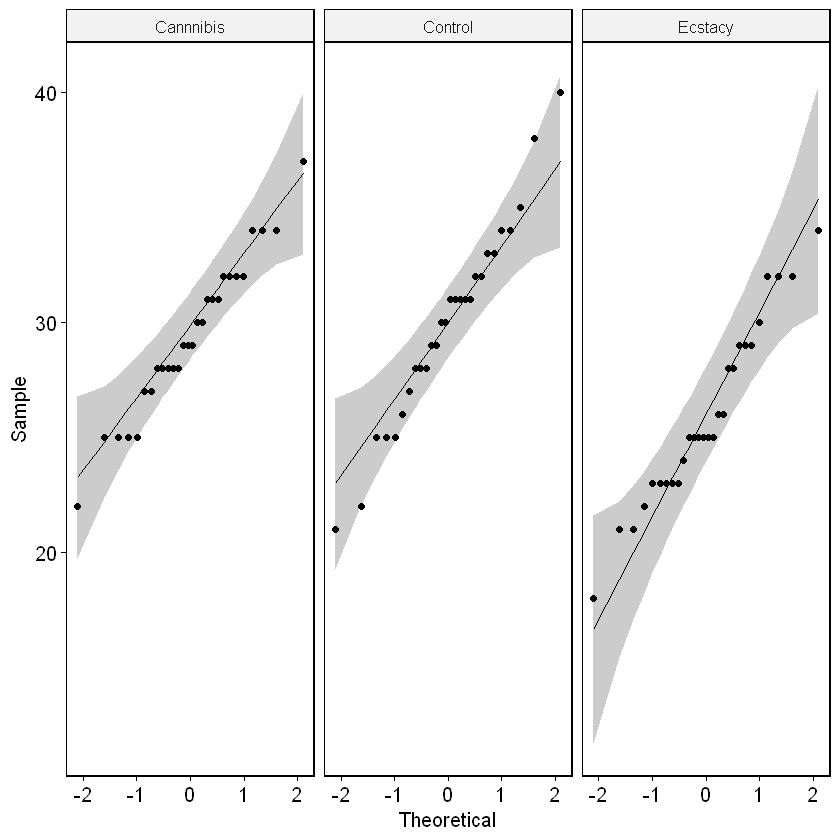

In [17]:
ggqqplot(Drug_long, "Performance", facet.by = "Type")

In [18]:
Drug_long %>% group_by(Type) %>% identify_outliers(Performance)

Type,Performance,is.outlier,is.extreme
<chr>,<dbl>,<lgl>,<lgl>
Control,40,TRUE,FALSE


In [19]:
Drug_long %>% group_by(Type) %>% shapiro_test(Performance)

Type,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
Cannnibis,Performance,0.9787536,0.8195677
Control,Performance,0.9823961,0.9033555
Ecstacy,Performance,0.9622613,0.3939298


In [20]:
Drug_long %>% levene_test(Performance~Type)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,81,0.4647259,0.6299721


All the persumptions of parametric tests are valid, so we proceed to use them.

In [21]:
Drug_long %>% anova_test(Performance~Type)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Type,2,81,8.797,0.000349,*,0.178


In [22]:
Drug_long %>% emmeans_test(Performance ~ Type, p.adjust.method = "bonferroni")

,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Type,Performance,Cannnibis,Control,81,-0.5487875,0.5846608728,1.0000000000,ns
2,Type,Performance,Cannnibis,Ecstacy,81,3.3270242,0.0013215815,0.0039647446,**
3,Type,Performance,Control,Ecstacy,81,3.8758117,0.0002148296,0.0006444888,***


In [23]:
tressdrug = Drug_long %>% emmeans_test(Performance ~ Type, p.adjust.method = "bonferroni")
boxressdrug = ggboxplot(Drug_long, x="Type", y="Performance", color="Type")

In [24]:
tressdrug = tressdrug %>% add_xy_position(x = "Type")

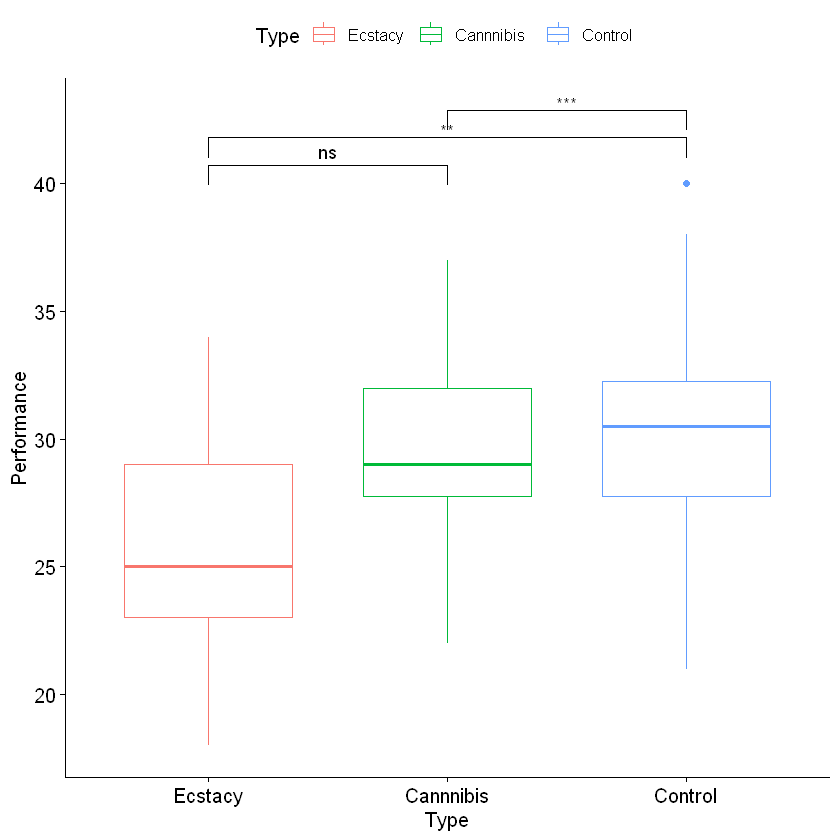

In [26]:
boxressdrug + stat_pvalue_manual(tressdrug)

In [27]:
Drug_long %>% cohens_d(Performance~Type)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Performance,Cannnibis,Control,-0.1464931,28,28,negligible
2,Performance,Cannnibis,Ecstacy,0.9496999,28,28,large
3,Performance,Control,Ecstacy,0.9783669,28,28,large


## Answer:
Anova test result shows that there is meaningful colaboration between drug usage and task performance, then post hoc test was performed to know that which type for drug usage in comparison to which, has affected task performance, as we can see, bonferroni adjusted multiple t test results shows that most significant difference was between Ecstacy abuse group and control group, and then between ecxtacy and cannabis abuse groups, but there was no significant difference between control group and cannabis abusers, which might indicate that ecstasy abuse has most effect on task performance whilst Cannabis abuse did not show much difference in task performance, the effect size computed supports this conclusion, there is only a negligible effect between cannabis abuse and control group, whilst between ecstay abuse groups and other two groups the effect size magnitude is large, so its safe to report that ecstacy absude affects task performance in large scales, but cannabis abuse might not have the same effect.